<a href="https://colab.research.google.com/github/kaidalisohaib/AICohortW24/blob/Sohaib/notebooks/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.5


## Step 1: Import necessary libraries

In [2]:
import os
import time
import logging
import shutil
from math import ceil
from datetime import datetime
from importlib import reload  # Not needed in Python 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reload(logging)
# %matplotlib inline

sns.set_context("notebook")
sns.set_theme(style="ticks")
sns.color_palette("rocket", as_cmap=True)


# Set up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S', 
                    handlers=[
        logging.StreamHandler()
    ],)
logger = logging.getLogger(__name__)

## Step 2: Load the dataset

In [3]:
input_file_path = "https://raw.githubusercontent.com/kaidalisohaib/DAIJChallenge24/main/data/sdg_index_2000-2022.csv"

df = pd.read_csv(input_file_path, header=0)

df.head()

all_columns = df.columns.tolist()

# Define target column
target_column = "goal_11_score"

# Get all feature columns except one
all_features = all_columns
all_features.remove(target_column)

# Get numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Get non-numerical (categorical) columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("All the columns:\n", all_columns)
print("Target column:\n", target_column)
print("Features columns:\n", all_features)
print("Numerical Columns:\n", numerical_cols)
print("Categorical Columns:\n", categorical_cols)

All the columns:
 ['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
Target column:
 goal_11_score
Features columns:
 ['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
Numerical Columns:
 ['year', 'sdg_index_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'go

## Step 3: Data exploration

### 3.2 Data Visualization

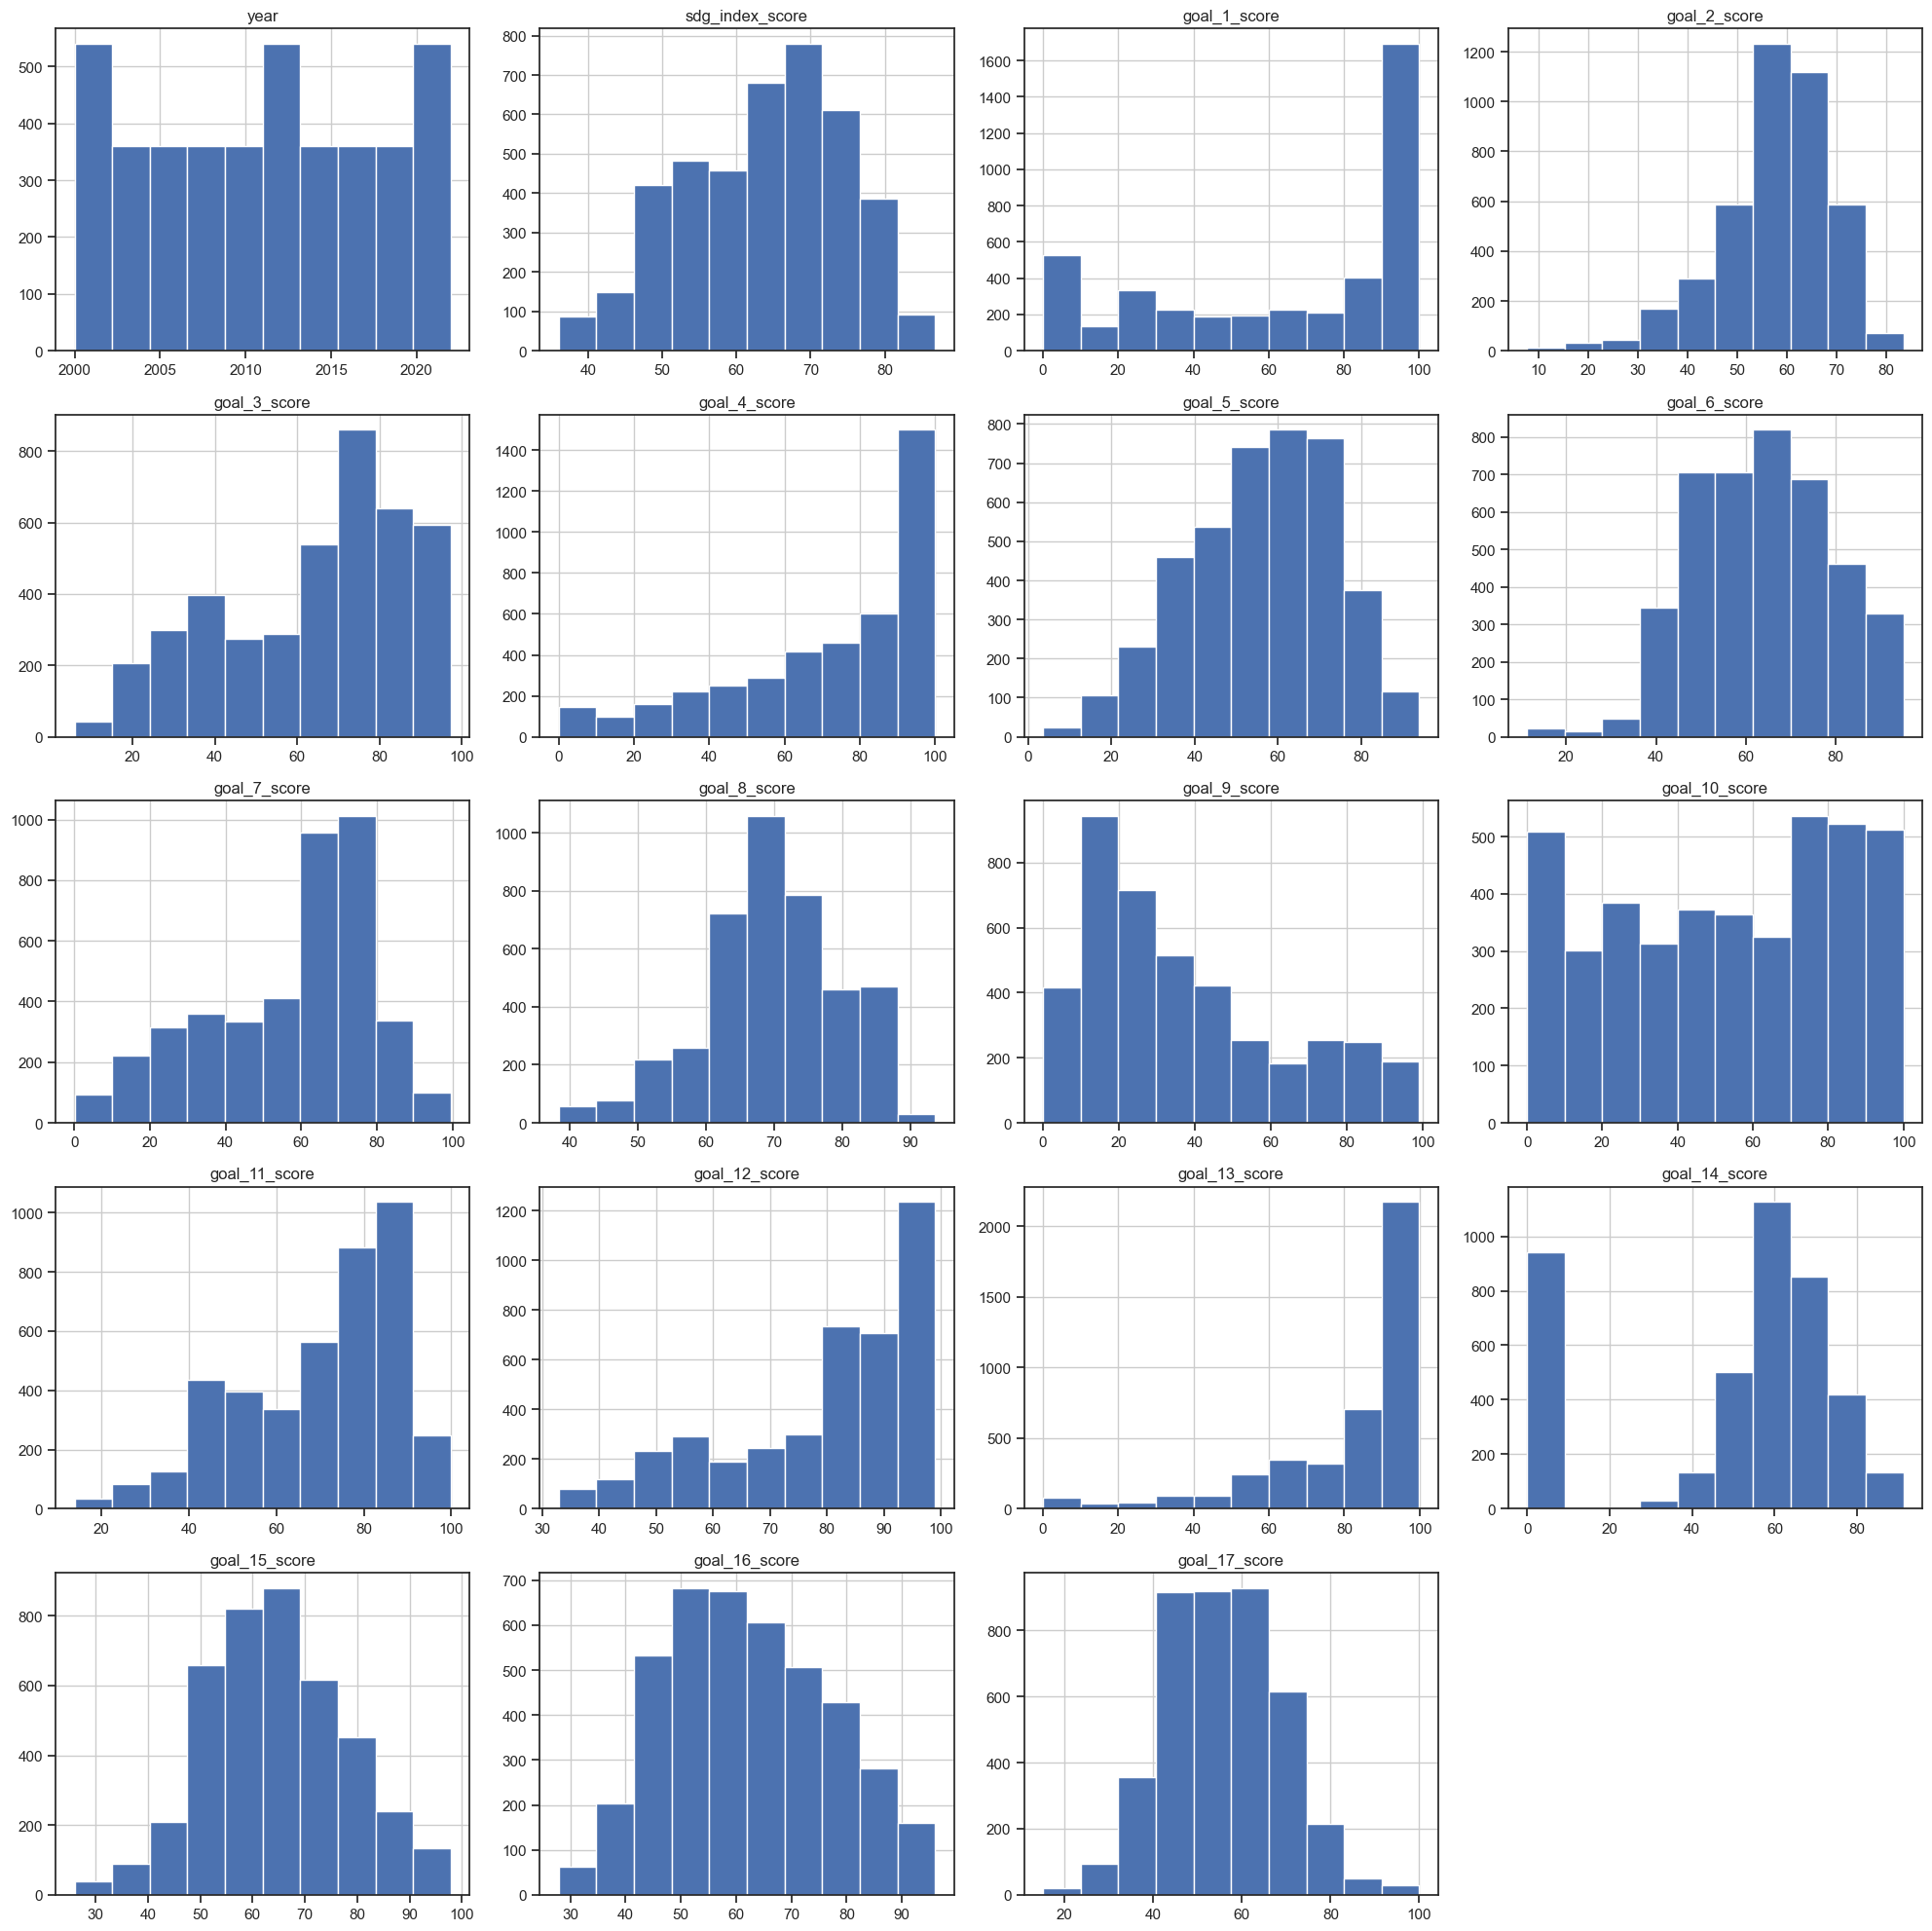

In [4]:
sample_df = df.sample(frac=1.0, random_state=42)

df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()


### 3.3 Pattern identification

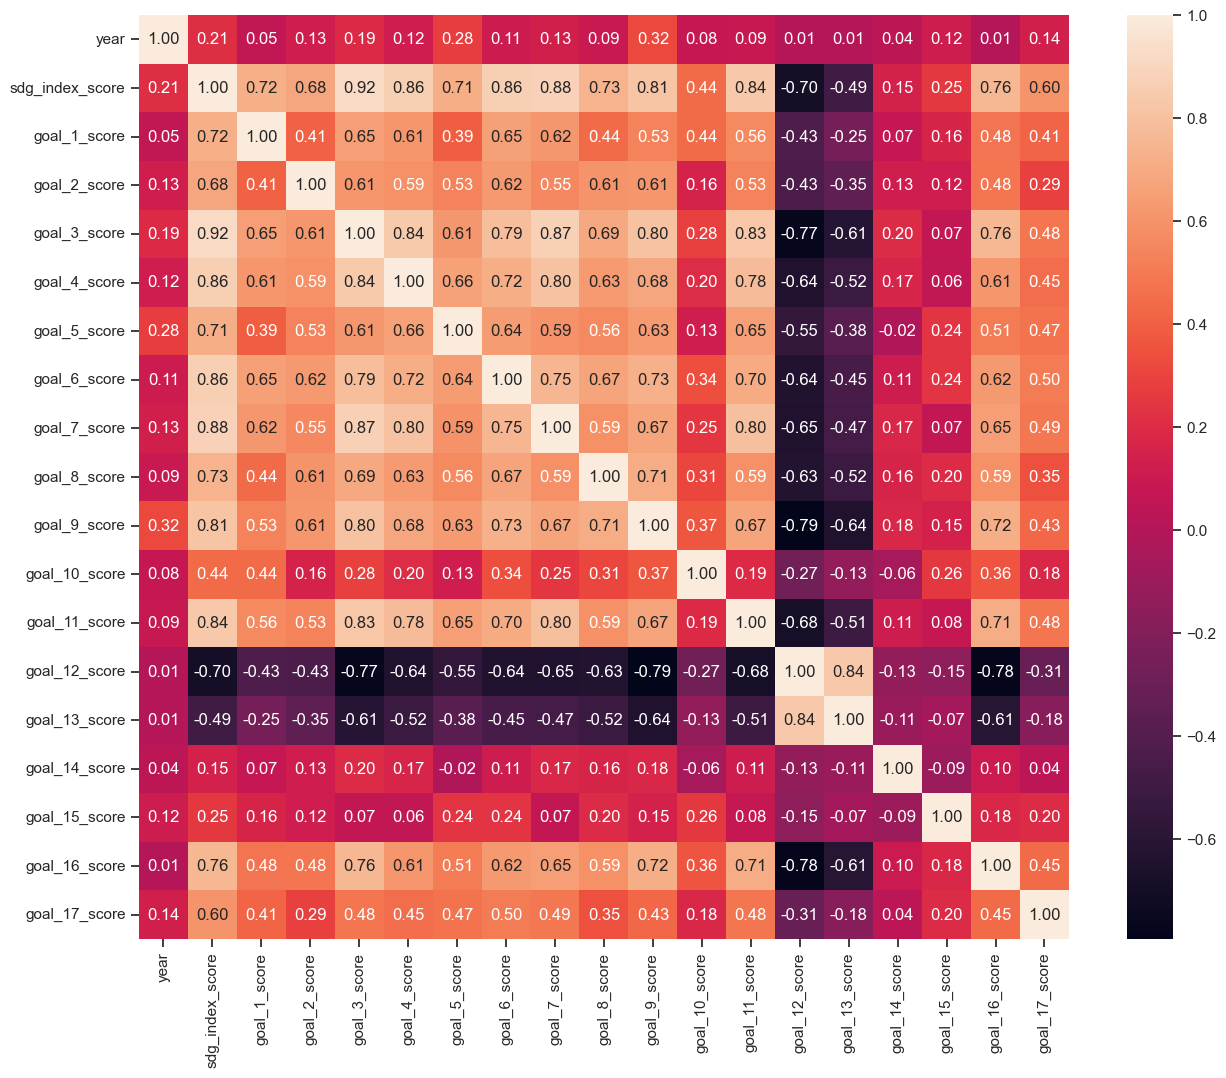

In [5]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f")
plt.show()

In [28]:
!pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 KB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Coding\DAIJChallenge24\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [27]:
import statsmodel

ModuleNotFoundError: No module named 'statsmodel'

In [30]:
import plotly.express as px
exports = pd.read_csv("./data/exports.csv")
exports1 = pd.read_csv("./data/export1.csv")

co2_emissions_2022_df = pd.read_csv("./data/co-emissions-per-capita.csv")
co2_emissions_2022_df = co2_emissions_2022_df[co2_emissions_2022_df['Year'] == 2022]
co2_emissions_2022_df = co2_emissions_2022_df[co2_emissions_2022_df['Entity'] != "World"]
co2_emissions_2022_df = co2_emissions_2022_df.dropna(subset=['Code'])
co2_emissions_2022_df = co2_emissions_2022_df.drop('Year', axis=1)
co2_emissions_2022_df = co2_emissions_2022_df.drop('Code', axis=1)
co2_emissions_2022_df.rename(columns={"Annual CO₂ emissions (per capita)": "CO2"}, inplace=True)
co2_emissions_2022_df.index = co2_emissions_2022_df["Entity"].values
valentina_delta_mean = (co2_emissions_2022_df['CO2']-co2_emissions_2022_df["CO2"].mean())
valentina_delta_mean.index = co2_emissions_2022_df["Entity"].values
co2_emissions_2022_df = co2_emissions_2022_df.drop('Entity', axis=1)

co2_emissions_2022_df["perc"] = np.nan
co2_emissions_2022_df["perc1"] = np.nan
print(exports.head())
print(co2_emissions_2022_df.head())

for country in co2_emissions_2022_df.index:
    if country in exports["Country"].values:
        # Directly assign the value avoiding chained indexing
        export_value = exports.loc[exports["Country"] == country, "exportp"].values[0]
        co2_emissions_2022_df.loc[country, "perc"] = export_value

for country in co2_emissions_2022_df.index:
    if country in exports1["Country"].values:
        # Directly assign the value avoiding chained indexing
        export_value = exports1.loc[exports1["Country"] == country, "exportp1"].values[0]
        co2_emissions_2022_df.loc[country, "perc1"] = export_value

co2_emissions_2022_df.dropna(inplace=True)

print(co2_emissions_2022_df.head())
co2_emissions_2022_df.reset_index(inplace=True)
df_ = px.data.tips()

fig = px.scatter(co2_emissions_2022_df, x=co2_emissions_2022_df["perc"], y=co2_emissions_2022_df["CO2"],hover_name="index",trendline='ols')

fig1 = px.scatter(co2_emissions_2022_df, x=co2_emissions_2022_df["perc1"], y=co2_emissions_2022_df["CO2"],hover_name="index", trendline='ols')

# sns.regplot(data=co2_emissions_2022_df, x="perc", y="CO2")
# plt.xlim(0, 10)

# Show the plot
fig.show()
fig1.show()
print()
# print(co2_emissions_2022_df.head())




       Country      export  exportp
0        Aruba   136764.75     8.96
1  Afghanistan   696410.25    11.77
2       Angola  2987024.17    23.61
3      Anguila    23000.89     9.73
4      Albania  1698325.03    14.06
                  CO2  perc  perc1
Afghanistan  0.295364   NaN    NaN
Albania      1.743200   NaN    NaN
Algeria      3.927226   NaN    NaN
Andorra      4.617124   NaN    NaN
Angola       0.451552   NaN    NaN
                  CO2   perc  perc1
Afghanistan  0.295364  11.77   1.62
Albania      1.743200  14.06   0.38
Algeria      3.927226  19.29   2.40
Andorra      4.617124  11.23   0.68
Angola       0.451552  23.61   0.14


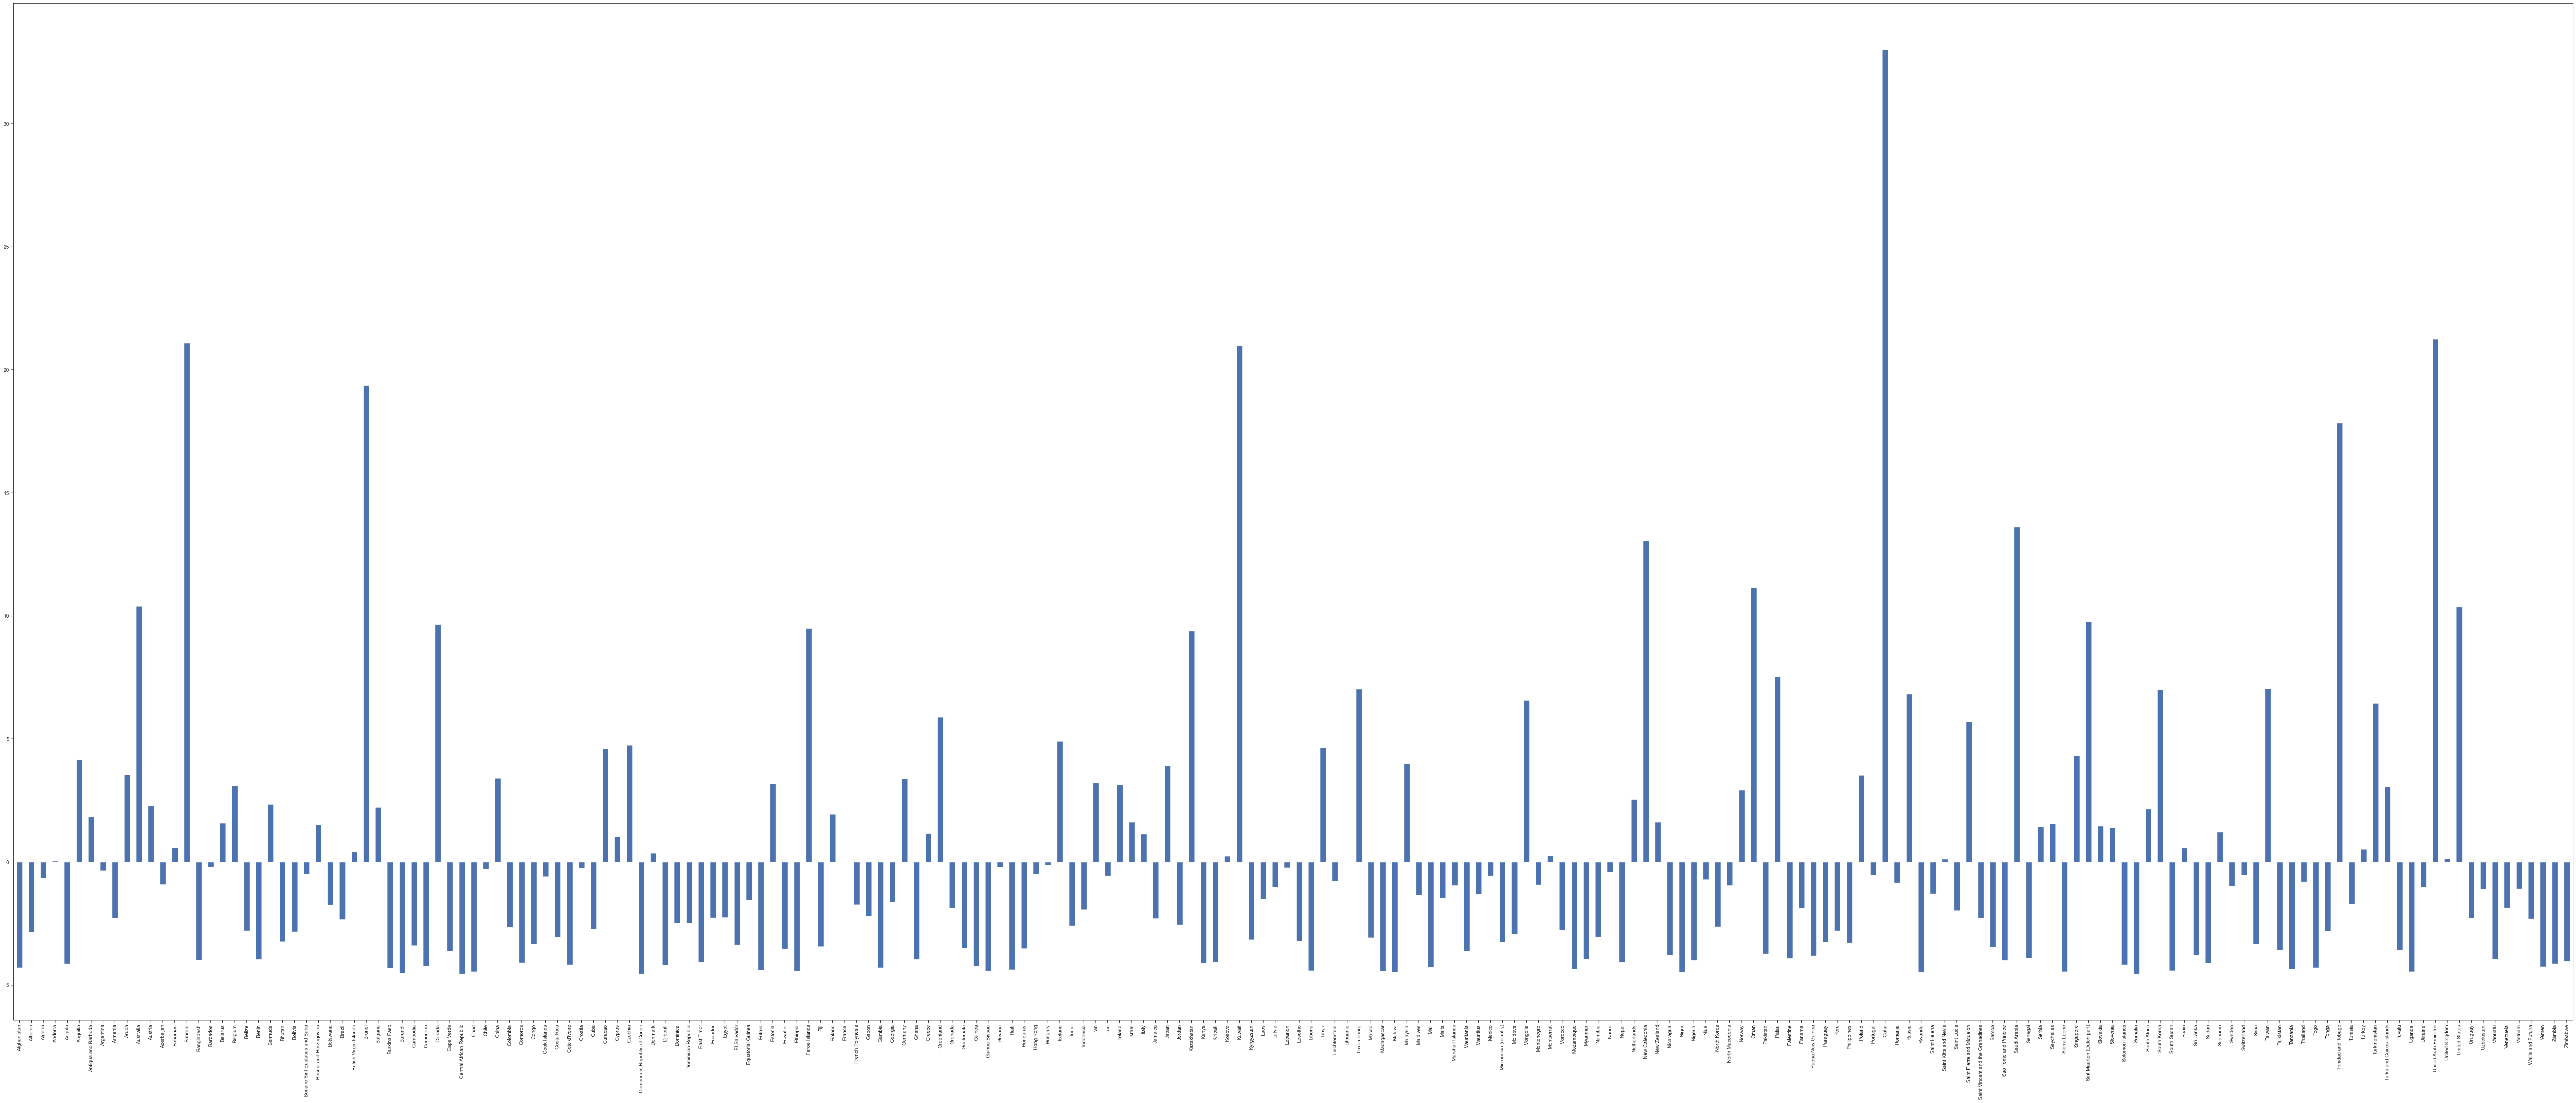

In [15]:
import matplotlib.pyplot as plt


# Plotting
valentina_delta_mean.plot.bar(figsize=(100, 40))

plt.show()
